In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from small_script.myFunctions import *
import feather
import Bio.PDB as bio

from sklearn.metrics import confusion_matrix


d3_to_index = bio.Polypeptide.d3_to_index  # we may want to adjust this in the future.
three_to_one = bio.Polypeptide.three_to_one
one_to_index = bio.Polypeptide.one_to_index
plt.rcParams['figure.figsize'] = [16.18033, 10]

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
def getFragPdb(pdbId, i, outFile=None):
    pdb = pdbId + ".pdb"
    if outFile is None:
        outFile = f"{i}_{pdb}"
#     pdb = "1igqB00.pdb"
#     pdbId = pdb.split('.')[0]
    pre = "/Users/weilu/Research/optimization/fragment/"
    database = "/Users/weilu/Research/optimization/fragment/database/dompdb/"
    parser = bio.PDBParser(QUIET=True)
    structure = parser.get_structure("x", os.path.join(database, pdb))
    for model in structure:
        for chain in model:
            all_residues = list(chain)
            io = bio.PDBIO()
            c = bio.Chain.Chain("A")
            c.child_list = all_residues[i:i+9]
#             for ii, res in enumerate(c):
#                 res.id = (' ', ii+1, ' ')
            io.set_structure(c)
            io.save(f'{pre}{outFile}')

In [130]:
data_original = feather.read_dataframe("/Users/weilu/Research/optimization/fragment/cluster100.feather")

# random structure from 5 clusters

In [178]:
t = data_original.query("cluster < 5").groupby("cluster").apply(pd.DataFrame.sample, 4)

In [181]:
for i, row in t.reset_index(drop=True).iterrows():
    print(i, row["pdb"], row["i"], row["cluster"])
    getFragPdb(row["pdb"], int(row["i"]), f"cluster0to4/{i}_cluster_{row['cluster']}.pdb")

0 3un9A01 55 0
1 2vovA00 163 0
2 3psfA03 228 0
3 4nn5B01 20 0
4 1zu0A03 84 1
5 1jplA00 86 1
6 4ovjA02 77 1
7 5lozA00 112 1
8 4g0aA01 3 2
9 3lppA02 115 2
10 1umhA00 32 2
11 2jgvB00 157 2
12 2c43A01 17 3
13 2c9eA00 13 3
14 4lr2A01 86 3
15 3zheB02 116 3
16 2taaA02 55 4
17 3doaA01 118 4
18 1ywkC00 217 4
19 3ty1A00 204 4


In [191]:
# compute the rmsd with respect to the pdb that closest to the cluster center
pre = "/Users/weilu/Research/optimization/fragment/"
pdbList = glob.glob(f"{pre}cluster0to4/[0-9]*.pdb")
with open(pre+"cluster0to4_rmsd.csv", "w") as out:
    out.write("i,j,rmsd\n")
    for p1 in pdbList:
        print(p1)
        i1 = p1.split("/")[-1].split(".")[0]
#         if i1 != 0:
#             continue
        print(i1)
        for p2 in pdbList:
            i2 = p2.split("/")[-1].split(".")[0]
            rmsd = float(getFromTerminal(f"calculate_rmsd.py {p1} {p2}"))
            out.write(f"{i1},{i2},{rmsd}\n")

/Users/weilu/Research/optimization/fragment/cluster0to4/5_cluster_1.pdb
5_cluster_1
/Users/weilu/Research/optimization/fragment/cluster0to4/1_cluster_0.pdb
1_cluster_0
/Users/weilu/Research/optimization/fragment/cluster0to4/13_cluster_3.pdb
13_cluster_3
/Users/weilu/Research/optimization/fragment/cluster0to4/17_cluster_4.pdb
17_cluster_4
/Users/weilu/Research/optimization/fragment/cluster0to4/10_cluster_2.pdb
10_cluster_2
/Users/weilu/Research/optimization/fragment/cluster0to4/6_cluster_1.pdb
6_cluster_1
/Users/weilu/Research/optimization/fragment/cluster0to4/14_cluster_3.pdb
14_cluster_3
/Users/weilu/Research/optimization/fragment/cluster0to4/2_cluster_0.pdb
2_cluster_0
/Users/weilu/Research/optimization/fragment/cluster0to4/8_cluster_2.pdb
8_cluster_2
/Users/weilu/Research/optimization/fragment/cluster0to4/19_cluster_4.pdb
19_cluster_4
/Users/weilu/Research/optimization/fragment/cluster0to4/18_cluster_4.pdb
18_cluster_4
/Users/weilu/Research/optimization/fragment/cluster0to4/9_cluste

In [192]:
cluster_rmsd = pd.read_csv(pre+"cluster0to4_rmsd.csv")

In [206]:
cluster_rmsd["rmsd"] = cluster_rmsd["rmsd"].round(3)
cluster_rmsd["ii"] = cluster_rmsd["i"].apply(lambda x: int(x.split("_")[0]))
cluster_rmsd["jj"] = cluster_rmsd["j"].apply(lambda x: int(x.split("_")[0]))
cluster_rmsd = cluster_rmsd.sort_values(["ii", "jj"])
t = cluster_rmsd.pivot(index="ii", columns="jj", values="rmsd")

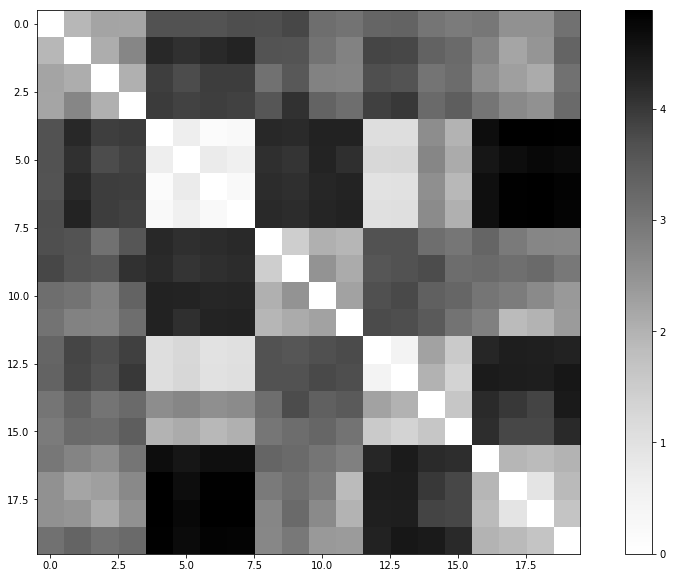

In [218]:
plt.rcParams['figure.figsize'] = [16.18033, 10]
plt.imshow(t, cmap="Greys")
plt.colorbar()

# 5 cluster center.

In [221]:
t = data_original.query("cluster < 5").groupby("cluster").head(4)

In [222]:
folder = "cluster0to4_center"
for i, row in t.reset_index(drop=True).iterrows():
#     print(i, row["pdb"], row["i"], row["cluster"])
    getFragPdb(row["pdb"], int(row["i"]), f"{folder}/{i}_cluster_{row['cluster']}.pdb")

0 1g9mG00 206 0
1 1wyuB03 158 0
2 1gqiA02 246 0
3 4c8pA00 89 0
4 5cr9A02 26 1
5 1ic2A00 11 1
6 4r33A00 51 1
7 1oaoC03 163 1
8 2h7fX02 93 2
9 2w2iA00 179 2
10 1d7pM00 117 2
11 2q83A02 121 2
12 2q9oA03 200 3
13 1vchD00 41 3
14 1uqtA01 108 3
15 1ej6B00 574 3
16 4yokA01 40 4
17 2e8yA01 70 4
18 3pjyA00 7 4
19 3sluB01 51 4


In [223]:
# compute the rmsd with respect to the pdb that closest to the cluster center

pre = "/Users/weilu/Research/optimization/fragment/"
pdbList = glob.glob(f"{pre}{folder}/[0-9]*.pdb")
with open(pre+f"{folder}_rmsd.csv", "w") as out:
    out.write("i,j,rmsd\n")
    for p1 in pdbList:
        print(p1)
        i1 = p1.split("/")[-1].split(".")[0]
#         if i1 != 0:
#             continue
        print(i1)
        for p2 in pdbList:
            i2 = p2.split("/")[-1].split(".")[0]
            rmsd = float(getFromTerminal(f"calculate_rmsd.py {p1} {p2}"))
            out.write(f"{i1},{i2},{rmsd}\n")

/Users/weilu/Research/optimization/fragment/cluster0to4_center/5_cluster_1.pdb
5_cluster_1
/Users/weilu/Research/optimization/fragment/cluster0to4_center/1_cluster_0.pdb
1_cluster_0
/Users/weilu/Research/optimization/fragment/cluster0to4_center/13_cluster_3.pdb
13_cluster_3
/Users/weilu/Research/optimization/fragment/cluster0to4_center/17_cluster_4.pdb
17_cluster_4
/Users/weilu/Research/optimization/fragment/cluster0to4_center/10_cluster_2.pdb
10_cluster_2
/Users/weilu/Research/optimization/fragment/cluster0to4_center/6_cluster_1.pdb
6_cluster_1
/Users/weilu/Research/optimization/fragment/cluster0to4_center/14_cluster_3.pdb
14_cluster_3
/Users/weilu/Research/optimization/fragment/cluster0to4_center/2_cluster_0.pdb
2_cluster_0
/Users/weilu/Research/optimization/fragment/cluster0to4_center/8_cluster_2.pdb
8_cluster_2
/Users/weilu/Research/optimization/fragment/cluster0to4_center/19_cluster_4.pdb
19_cluster_4
/Users/weilu/Research/optimization/fragment/cluster0to4_center/18_cluster_4.pdb


In [224]:
cluster_rmsd = pd.read_csv(pre+f"{folder}_rmsd.csv")
cluster_rmsd["rmsd"] = cluster_rmsd["rmsd"].round(3)
cluster_rmsd["ii"] = cluster_rmsd["i"].apply(lambda x: int(x.split("_")[0]))
cluster_rmsd["jj"] = cluster_rmsd["j"].apply(lambda x: int(x.split("_")[0]))
cluster_rmsd = cluster_rmsd.sort_values(["ii", "jj"])
t = cluster_rmsd.pivot(index="ii", columns="jj", values="rmsd")

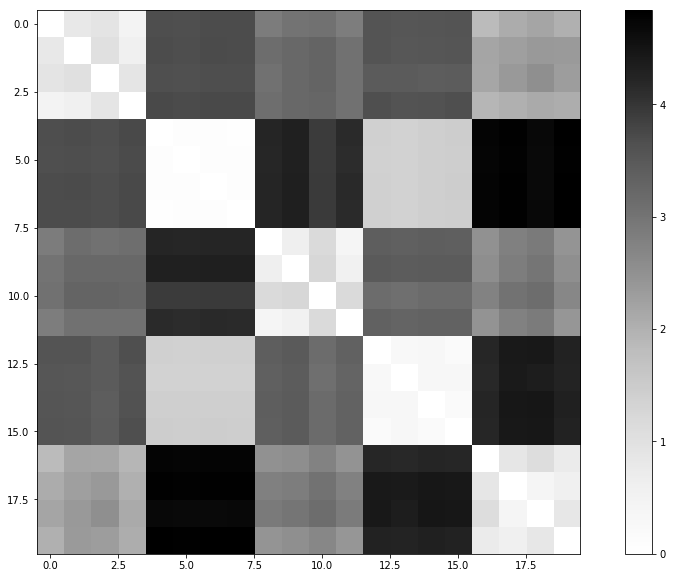

In [225]:
plt.rcParams['figure.figsize'] = [16.18033, 10]
plt.imshow(t, cmap="Greys")
plt.colorbar()

In [238]:
data_original.shape

(1901430, 89)

In [239]:
data_original.head()

,pdb,i,seq,caca_1,caca_2,caca_3,caca_4,caca_5,caca_6,caca_7,...,cbcb_14,cbcb_15,cbcb_16,cbcb_17,cbcb_18,cbcb_19,cbcb_20,cbcb_21,rmsd,cluster
0,1g9mG00,206,FFYCNSTQL,9.879721,13.365485,15.387287,18.605337,20.240051,19.853123,9.830854,...,14.465818,14.041501,9.975571,9.917680,9.397504,7.394856,9.067275,4.491067,4.966916,0
1,1wyuB03,158,QLYYDGANL,9.870072,12.872975,15.433169,18.492691,19.469760,19.349613,9.869476,...,13.653317,13.835575,9.690599,9.644212,8.670468,7.562226,9.338580,4.768490,5.051766,0
2,1gqiA02,246,THLAYQGPL,9.443632,12.430652,14.523600,17.825624,19.053972,18.688576,9.596665,...,12.804110,13.845181,10.013397,9.532242,8.748777,6.784276,8.743169,4.850136,5.151431,0
3,4c8pA00,89,AVIFDVSEN,9.920808,13.207690,15.512877,18.683271,20.596830,19.606644,9.877905,...,14.648695,13.808992,9.533399,10.704074,8.485997,8.005937,8.796261,5.409743,5.206578,0
4,3stoA01,171,KNTLDLVPT,10.185408,13.765726,15.791227,19.181437,20.328955,19.526373,10.073597,...,13.647936,13.585122,9.760163,9.854342,8.159576,6.618244,8.337652,5.255162,5.255510,0


In [219]:
data_original.query("cluster < 5")["cluster"].value_counts()

1    382971
2     28523
4     22208
3     21066
0     10646
Name: cluster, dtype: int64

In [161]:
data_original.head()

,pdb,i,seq,caca_1,caca_2,caca_3,caca_4,caca_5,caca_6,caca_7,...,cbcb_14,cbcb_15,cbcb_16,cbcb_17,cbcb_18,cbcb_19,cbcb_20,cbcb_21,rmsd,cluster
0,1g9mG00,206,FFYCNSTQL,9.879721,13.365485,15.387287,18.605337,20.240051,19.853123,9.830854,...,14.465818,14.041501,9.975571,9.917680,9.397504,7.394856,9.067275,4.491067,4.966916,0
1,1wyuB03,158,QLYYDGANL,9.870072,12.872975,15.433169,18.492691,19.469760,19.349613,9.869476,...,13.653317,13.835575,9.690599,9.644212,8.670468,7.562226,9.338580,4.768490,5.051766,0
2,1gqiA02,246,THLAYQGPL,9.443632,12.430652,14.523600,17.825624,19.053972,18.688576,9.596665,...,12.804110,13.845181,10.013397,9.532242,8.748777,6.784276,8.743169,4.850136,5.151431,0
3,4c8pA00,89,AVIFDVSEN,9.920808,13.207690,15.512877,18.683271,20.596830,19.606644,9.877905,...,14.648695,13.808992,9.533399,10.704074,8.485997,8.005937,8.796261,5.409743,5.206578,0
4,3stoA01,171,KNTLDLVPT,10.185408,13.765726,15.791227,19.181437,20.328955,19.526373,10.073597,...,13.647936,13.585122,9.760163,9.854342,8.159576,6.618244,8.337652,5.255162,5.255510,0


In [3]:
data_original = feather.read_dataframe("/Users/weilu/Research/optimization/fragment/cluster100_v2.feather")

In [4]:
data = data_original[["pdb", "i", "seq","cluster", "rmsd"]].reset_index(drop=True)
data["cluster"] = data["cluster"].astype(int)
for i in range(1,10):
    data[f"s{i}"] = data["seq"].apply(lambda x: one_to_index(x[i-1]))

In [5]:
data.to_feather("/Users/weilu/Research/optimization/fragment/cluster100_v2_processed.feather")
# data.to_feather("/Users/weilu/Research/optimization/fragment/cluster100_processed.feather")

In [226]:
data = feather.read_dataframe("/Users/weilu/Research/optimization/fragment/cluster100_processed.feather")

In [6]:
data = feather.read_dataframe("/Users/weilu/Research/optimization/fragment/cluster100_v2_processed.feather")

In [9]:
data.head()

,pdb,i,seq,cluster,rmsd,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1bg6A02,107,RAVNVPTPL,0,5.756177,14,0,17,11,17,12,16,12,9
1,3g85A02,38,HKNGIKISE,0,6.329374,6,8,11,5,7,8,7,15,3
2,4je5C00,166,EAQGVITFP,0,6.365145,3,0,13,5,17,7,16,4,12
3,3q41A01,88,GFYRIPVLG,0,6.389094,5,4,19,14,7,12,17,9,5
4,1auqA00,144,KKKKVIVIP,0,6.450880,8,8,8,8,17,7,17,7,12


In [228]:
data = data.query("cluster < 2")

In [229]:
data["cluster"].value_counts()

1    382971
0     10646
Name: cluster, dtype: int64

In [241]:
maxlen = 9
test = data.groupby("cluster").apply(pd.DataFrame.sample, 10000, replace=True)
# test = data.query("category > -1 and category < 10").sample(10000)
x_train = test.iloc[:, 5:14].values
y_train_value = test["cluster"].values
test = data.groupby("cluster").apply(pd.DataFrame.sample, 10000, replace=True)
# test = data.query("category > -1 and category < 10").sample(10000)
x_test = test.iloc[:, 5:14].values
y_test_value = test["cluster"].values



In [253]:
maxlen = 9
test = data.groupby("cluster").apply(pd.DataFrame.sample, 10000, replace=True)
# test = data.query("category > -1 and category < 10").sample(10000)
x_train = test.iloc[:, 5:14].values
y_train_value = test["cluster"].values
test = data.groupby("cluster").apply(pd.DataFrame.sample, 10000, replace=True)
# test = data.query("category > -1 and category < 10").sample(10000)
x_test = test.iloc[:, 5:14].values
y_test_value = test["cluster"].values

# print('Pad sequences (samples x time)')
# x_train1 = sequence.pad_sequences(x_train, maxlen=10)
# x_test1 = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
y_train = to_categorical(np.array(y_train_value))
y_test = to_categorical(np.array(y_test_value))

x_train shape: (20000, 9)


In [248]:
np.all(x_train1 == x_train)

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

(20000,)

In [251]:
y_train.shape

(20000, 2)

In [236]:
from keras.utils import to_categorical
max_features = 100
# cut texts after this number of words
# (among top max_features most common words)

batch_size = 1024*2

print(len(x_train), 'train sequences')



model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# try using different optimizers and different optimizer configs
# model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=40,
          validation_data=[x_test, y_test])

20000 train sequences
Train...
Train on 20000 samples, validate on 20000 samples
Epoch 1/40
20000/20000 [==============================] - 9s 456us/step - loss: 0.6777 - acc: 0.6865 - val_loss: 0.6499 - val_acc: 0.7552
Epoch 2/40
20000/20000 [==============================] - 3s 163us/step - loss: 0.6063 - acc: 0.7463 - val_loss: 0.5310 - val_acc: 0.7519
Epoch 3/40
20000/20000 [==============================] - 3s 163us/step - loss: 0.5059 - acc: 0.7521 - val_loss: 0.4727 - val_acc: 0.7712
Epoch 4/40
20000/20000 [==============================] - 3s 173us/step - loss: 0.4595 - acc: 0.7837 - val_loss: 0.4319 - val_acc: 0.8012
Epoch 5/40
20000/20000 [==============================] - 3s 170us/step - loss: 0.4318 - acc: 0.8013 - val_loss: 0.4096 - val_acc: 0.8093
Epoch 6/40
20000/20000 [==============================] - 3s 169us/step - loss: 0.4102 - acc: 0.8122 - val_loss: 0.3900 - val_acc: 0.8214
Epoch 7/40
20000/20000 [==============================] - 4s 186us/step - loss: 0.3999 - ac

In [237]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 9, 128)            12800     
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 258       
Total params: 111,874
Trainable params: 111,874
Non-trainable params: 0
_________________________________________________________________


In [234]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 9, 128)            2560      
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 258       
Total params: 101,634
Trainable params: 101,634
Non-trainable params: 0
_________________________________________________________________


In [160]:
from keras.utils import to_categorical
max_features = 20
# cut texts after this number of words
# (among top max_features most common words)

batch_size = 1024*2

print(len(x_train), 'train sequences')



model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# try using different optimizers and different optimizer configs
# model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=40,
          validation_data=[x_test, y_test])

1000000 train sequences
Train...
Train on 1000000 samples, validate on 1000000 samples
Epoch 1/40
1000000/1000000 [==============================] - 203s 203us/step - loss: 4.3113 - acc: 0.0507 - val_loss: 4.1467 - val_acc: 0.0794
Epoch 2/40
1000000/1000000 [==============================] - 194s 194us/step - loss: 4.1239 - acc: 0.0827 - val_loss: 4.0079 - val_acc: 0.1031
Epoch 3/40
1000000/1000000 [==============================] - 196s 196us/step - loss: 4.0236 - acc: 0.1016 - val_loss: 3.9225 - val_acc: 0.1182
Epoch 4/40
1000000/1000000 [==============================] - 192s 192us/step - loss: 3.9654 - acc: 0.1115 - val_loss: 3.8749 - val_acc: 0.1254
Epoch 5/40
1000000/1000000 [==============================] - 184s 184us/step - loss: 3.9337 - acc: 0.1167 - val_loss: 3.8524 - val_acc: 0.1293
Epoch 6/40
1000000/1000000 [==============================] - 198s 198us/step - loss: 3.9151 - acc: 0.1201 - val_loss: 3.8367 - val_acc: 0.1316
Epoch 7/40
1000000/1000000 [=====================

In [8]:
data = feather.read_dataframe("/Users/weilu/Research/optimization/fragment/feather_cluster_data.feather")

In [15]:
data.head()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1igqB00,0,DKLKKAIVQ,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",-1,-1,2,8,9,8,8,0,7,17,13
1,1igqB00,1,KLKKAIVQV,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",-1,-1,8,9,8,8,0,7,17,13,17
2,1igqB00,2,LKKAIVQVE,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",-1,-1,9,8,8,0,7,17,13,17,3
3,1igqB00,3,KKAIVQVEH,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987,13,8,8,0,7,17,13,17,3,6
4,1igqB00,4,KAIVQVEHD,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835,18,8,0,7,17,13,17,3,6,2


In [56]:
data["dd"].value_counts()

5,7,9,9,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,7,5                    39130
5,7,9,11,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,7,5                   20575
5,7,9,9,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5                   18996
5,7,9,9,11,13,5,7,9,11,11,5,7,9,9,5,7,9,5,7,5                   18382
5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5                  14304
5,7,9,9,11,13,5,7,9,11,11,5,7,9,11,5,7,9,5,7,5                  12961
5,7,9,11,11,13,5,7,9,11,11,5,7,9,9,5,7,9,5,7,5                  12641
5,7,9,11,11,13,5,7,9,11,11,5,7,9,11,5,7,9,5,7,5                 12033
5,7,9,9,11,13,5,7,9,9,11,5,5,9,9,5,7,9,5,7,5                     7326
5,7,9,9,11,13,5,7,9,11,11,5,5,9,9,5,7,9,5,7,5                    6656
5,7,9,11,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5                    5374
5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5                     5195
5,7,9,9,11,13,5,7,9,9,11,5,7,9,9,5,5,9,5,7,5                     4941
5,7,9,9,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,5,5                     4867
5,7,9,9,11,13,5,7,9,

In [10]:
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb


Using TensorFlow backend.


In [19]:
x_train.shape

(25000, 100)

In [40]:
data.query("category == 11").shape

(5195, 15)

# cat 10 and 11 are very similar. they should be in the same group.

In [59]:
data.query("category == 10 or category == 11").sample(10)

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
299936,3tulA00,66,AKSVYDAAT,"5,7,9,11,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",10,5374,0,8,15,17,19,2,0,0,16
1876837,1k1fA00,27,DIEQELERA,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,2,7,3,13,3,9,3,14,0
418011,1ztpA01,107,AWAGIARAV,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,0,18,0,5,7,0,14,0,17
1211494,3zkvA00,758,QFLTHFVMQ,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,13,4,9,16,6,4,17,10,13
313392,1pp1X01,110,HCCSLLIGV,"5,7,9,11,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",10,5374,6,1,1,15,9,9,7,5,17
429159,2j7qA00,169,DFTEAISAL,"5,7,9,11,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",10,5374,2,4,16,3,0,7,15,0,9
1323194,1s7oB00,96,KISILTSID,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,8,7,15,7,9,16,15,7,2
192023,2pftA00,27,YLGSMAKIQ,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,19,9,5,15,10,0,8,7,13
1204807,4f3qA01,7,AKARQDAKR,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,0,8,0,14,13,2,0,8,14
1324321,3aqpA02,21,LEKARTVLE,"5,7,9,11,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",10,5374,9,3,8,0,14,16,17,9,3


In [58]:
data.query("category == 29 or category == 11").sample(10)

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
1211147,3zkvA00,395,LEACIYSFQ,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,9,3,0,1,7,19,15,4,13
1711744,2itbA00,36,FKAASTALS,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,4,8,0,0,15,16,0,9,15
413878,3rjvA01,15,RAQYYLADT,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,14,0,13,19,19,9,0,2,16
1836419,5tkyA03,30,ALRRLRTAC,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,0,9,14,14,9,14,16,0,1
1216811,1w9cA00,141,FFLLLQAVN,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,4,4,9,9,9,13,0,17,11
249112,1ej6B00,233,INPTEIEWA,"9,7,7,11,11,11,5,7,9,11,11,5,7,9,9,5,7,9,5,7,5",29,2452,7,11,12,16,3,7,3,18,0
1664651,2qtfA01,42,IQYDKLQQI,"9,7,7,11,11,11,5,7,9,11,11,5,7,9,9,5,7,9,5,7,5",29,2452,7,13,19,2,8,9,13,13,7
950129,1xflA00,46,APFFADLAK,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,0,12,4,4,0,2,9,0,8
310748,2yyuB00,138,VETVAHYAA,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,17,3,16,17,0,6,19,0,0
822123,3qvsA01,236,PLILDIARF,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,12,9,7,9,2,7,0,14,4


In [55]:
data.query("category == 4 or category == 11").sample(10)

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
1691660,3ar4A04,179,TGPVKEKIL,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",4,14304,16,5,12,17,8,3,8,7,9
606678,4fguB02,2,DVPLTIMKR,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",4,14304,2,17,12,9,16,7,10,8,14
1297613,4muoA02,229,GLARVNQAF,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",4,14304,5,9,0,14,17,11,13,0,4
395061,5aj3P00,95,TNAERLRRK,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,16,11,0,3,14,9,14,14,8
1029953,2oryA00,207,NADFADYFD,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,11,0,2,4,0,2,19,4,2
1765556,1zhcA00,45,VSHMKKQKL,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",4,14304,17,15,6,10,8,8,13,8,9
755750,4i9cA02,181,DLEDFAIDV,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,2,9,3,2,4,0,7,2,17
1486275,1h9eA00,14,LKSELVANN,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",4,14304,9,8,15,3,9,17,0,11,11
1200946,3s1sA02,125,DIELGKVLS,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",4,14304,2,7,3,9,5,8,17,9,15
1072383,3it4B01,56,AQADLDEAV,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",4,14304,0,13,0,2,9,2,3,0,17


In [28]:
test.head()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
929058,3i4rB00,40,DRAVTQISV,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,2,14,0,17,16,13,7,15,17
1276353,4tl2A02,72,DWHDLAAFW,"5,7,9,11,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",10,5374,2,18,6,2,9,0,0,4,18
869288,1xdpA01,31,GIYSNNLDE,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,5,7,19,15,11,11,9,2,3
1358821,2g7lA00,132,LQDATATAA,"5,7,9,11,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",10,5374,9,13,2,0,16,0,16,0,0
857911,2jbrA03,83,ARALLEKTW,"5,7,9,9,11,13,5,5,9,9,11,5,7,9,9,5,7,9,5,7,5",11,5195,0,14,0,9,9,3,8,16,18


In [102]:
data.query("category == 9").shape

(6656, 15)

In [ ]:
data.sample(replace)

In [117]:
test = data.query("category > -1 and category < 10").groupby("category").apply(pd.DataFrame.sample, 10000, replace=True)
# test = data.query("category > -1 and category < 10").sample(10000)
x_train = test.iloc[:, 6:15].values
y_train_value = test["category"].values
test = data.query("category > -1 and category < 10").groupby("category").apply(pd.DataFrame.sample, 10000, replace=True)
# test = data.query("category > -1 and category < 10").sample(10000)
x_test = test.iloc[:, 6:15].values
y_test_value = test["category"].values

# print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
y_train = to_categorical(np.array(y_train_value))
y_test = to_categorical(np.array(y_test_value))

Pad sequences (samples x time)
x_train shape: (100000, 9)


In [118]:
y_train.sum(axis=0)

array([10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000.], dtype=float32)

In [119]:
from keras.utils import to_categorical
max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 9
batch_size = 32

print(len(x_train), 'train sequences')



model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# try using different optimizers and different optimizer configs
# model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=40,
          validation_data=[x_test, y_test])

100000 train sequences
Train...
Train on 100000 samples, validate on 100000 samples
Epoch 1/10
100000/100000 [==============================] - 116s 1ms/step - loss: 2.2778 - acc: 0.1338 - val_loss: 2.2583 - val_acc: 0.1490
Epoch 2/10
100000/100000 [==============================] - 107s 1ms/step - loss: 2.2539 - acc: 0.1527 - val_loss: 2.2470 - val_acc: 0.1550
Epoch 3/10
100000/100000 [==============================] - 107s 1ms/step - loss: 2.2460 - acc: 0.1573 - val_loss: 2.2391 - val_acc: 0.1637
Epoch 4/10
100000/100000 [==============================] - 108s 1ms/step - loss: 2.2376 - acc: 0.1638 - val_loss: 2.2305 - val_acc: 0.1668
Epoch 5/10
100000/100000 [==============================] - 117s 1ms/step - loss: 2.2283 - acc: 0.1683 - val_loss: 2.2232 - val_acc: 0.1720
Epoch 6/10
100000/100000 [==============================] - 108s 1ms/step - loss: 2.2173 - acc: 0.1771 - val_loss: 2.2177 - val_acc: 0.1788
Epoch 7/10
100000/100000 [==============================] - 108s 1ms/step - 

In [121]:
model.fit(x_train, y_train,
          batch_size=10240,
          epochs=2,
          validation_data=[x_test, y_test])

Train on 100000 samples, validate on 100000 samples
Epoch 1/2
100000/100000 [==============================] - 18s 183us/step - loss: 1.7636 - acc: 0.3695 - val_loss: 2.0681 - val_acc: 0.2857
Epoch 2/2
100000/100000 [==============================] - 18s 176us/step - loss: 1.7558 - acc: 0.3744 - val_loss: 2.0647 - val_acc: 0.2868


In [122]:
y_pred = model.predict(x_test)
predicted = np.argmax(y_pred, axis=1)
confusion_matrix(y_test_value, predicted)

array([[1152,  964, 1188, 1183,  896,  947,  895,  789, 1236,  750],
       [ 912, 1745,  802,  828, 1418,  633, 1308,  977,  861,  516],
       [ 905,  722, 2160,  904, 1224, 1186,  572,  825,  979,  523],
       [ 859,  633,  823, 2042,  660, 1214, 1071,  865,  876,  957],
       [ 599, 1074, 1174,  536, 2915,  735,  837, 1127,  640,  363],
       [ 701,  367, 1100, 1265,  719, 2588,  725, 1062,  744,  729],
       [ 597, 1088,  474, 1141,  808,  690, 2615, 1361,  658,  568],
       [ 495,  690,  727,  729, 1215, 1004, 1155, 2928,  547,  510],
       [ 577,  407,  652,  559,  355,  533,  348,  337, 5154, 1078],
       [ 336,  201,  380,  794,  187,  586,  454,  370, 1308, 5384]])

In [123]:
y_pred = model.predict(x_test)

In [108]:
predicted = np.argmax(y_pred, axis=1)

In [110]:
confusion_matrix(y_test_value, predicted)

array([[107, 102, 141, 114,  57, 104,  74,  73, 138,  90],
       [ 82, 123,  97,  81, 108, 102, 100, 111, 118,  78],
       [ 88, 102, 133,  79,  88, 129,  48,  93, 123, 117],
       [ 81,  91, 122, 133,  68, 143,  87,  77,  97, 101],
       [ 66, 121, 128,  87, 114, 109,  80, 116, 105,  74],
       [ 89,  87, 115, 132,  72, 137,  71,  88, 109, 100],
       [ 70, 125,  94, 114, 113, 115, 107, 106,  89,  67],
       [ 64, 102, 119, 110, 105, 131,  94, 109,  86,  80],
       [ 96,  86, 124,  69,  66, 103,  40,  77, 219, 120],
       [ 82,  71, 126, 110,  61, 140,  45,  85, 128, 152]])

In [79]:
y_test[-1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [96]:
y_test.sum(axis=0)

array([2327., 1264., 1173., 1126.,  918.,  839.,  789.,  724.,  446.,
        394.], dtype=float32)

In [72]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [48]:
max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 9
batch_size = 32

print(len(x_train), 'train sequences')


print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
print('x_train shape:', x_train.shape)
y_train = np.array(y_train)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=40,
          validation_data=[x_train, y_train])

1000 train sequences
Pad sequences (samples x time)
x_train shape: (1000, 9)
Train...
Train on 1000 samples, validate on 1000 samples
Epoch 1/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6922 - acc: 0.5350 - val_loss: 0.6884 - val_acc: 0.5350
Epoch 2/40
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6875 - acc: 0.5500 - val_loss: 0.6816 - val_acc: 0.5980
Epoch 3/40
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6810 - acc: 0.5840 - val_loss: 0.6734 - val_acc: 0.5810
Epoch 4/40
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6768 - acc: 0.5630 - val_loss: 0.6698 - val_acc: 0.6030
Epoch 5/40
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6679 - acc: 0.5940 - val_loss: 0.6592 - val_acc: 0.6030
Epoch 6/40
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6623 - acc: 0.6020 - val_loss: 0.6546 - val_acc: 0.6100
Epoch 7/40
1000/1000 [==============================] - 1s 1ms

In [11]:
max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 100
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[x_test, y_test])

Loading data...
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 98s 4ms/step - loss: 0.4393 - acc: 0.7982 - val_loss: 0.3589 - val_acc: 0.8412
Epoch 2/4
25000/25000 [==============================] - 99s 4ms/step - loss: 0.2482 - acc: 0.9024 - val_loss: 0.4077 - val_acc: 0.8422
Epoch 3/4
25000/25000 [==============================] - 99s 4ms/step - loss: 0.1685 - acc: 0.9390 - val_loss: 0.4364 - val_acc: 0.8392
Epoch 4/4
25000/25000 [==============================] - 98s 4ms/step - loss: 0.1138 - acc: 0.9591 - val_loss: 0.5522 - val_acc: 0.8333


In [17]:
data.head()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1igqB00,0,DKLKKAIVQ,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",-1,-1,2,8,9,8,8,0,7,17,13
1,1igqB00,1,KLKKAIVQV,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",-1,-1,8,9,8,8,0,7,17,13,17
2,1igqB00,2,LKKAIVQVE,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",-1,-1,9,8,8,0,7,17,13,17,3
3,1igqB00,3,KKAIVQVEH,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987,13,8,8,0,7,17,13,17,3,6
4,1igqB00,4,KAIVQVEHD,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835,18,8,0,7,17,13,17,3,6,2


In [125]:
"""Example of using Hierarchical RNN (HRNN) to classify MNIST digits.

HRNNs can learn across multiple levels
of temporal hierarchy over a complex sequence.
Usually, the first recurrent layer of an HRNN
encodes a sentence (e.g. of word vectors)
into a  sentence vector.
The second recurrent layer then encodes a sequence of
such vectors (encoded by the first layer) into a document vector.
This document vector is considered to preserve both
the word-level and sentence-level structure of the context.

# References

- [A Hierarchical Neural Autoencoder for Paragraphs and Documents]
    (https://arxiv.org/abs/1506.01057)
    Encodes paragraphs and documents with HRNN.
    Results have shown that HRNN outperforms standard
    RNNs and may play some role in more sophisticated generation tasks like
    summarization or question answering.
- [Hierarchical recurrent neural network for skeleton based action recognition]
    (http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7298714)
    Achieved state-of-the-art results on
    skeleton based action recognition with 3 levels
    of bidirectional HRNN combined with fully connected layers.

In the below MNIST example the first LSTM layer first encodes every
column of pixels of shape (28, 1) to a column vector of shape (128,).
The second LSTM layer encodes then these 28 column vectors of shape (28, 128)
to a image vector representing the whole image.
A final Dense layer is added for prediction.

After 5 epochs: train acc: 0.9858, val acc: 0.9864
"""
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM

# Training parameters.
batch_size = 32
num_classes = 10
epochs = 5

# Embedding dimensions.
row_hidden = 128
col_hidden = 128

# The data, split between train and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshapes data to 4D for Hierarchical RNN.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

row, col, pixel = x_train.shape[1:]

# 4D input.
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper.
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Final predictions and model.
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training.
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
  416/60000 [..............................] - ETA: 15:49 - loss: 2.2967 - acc: 0.1298

KeyboardInterrupt: 

In [128]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        